## 🔗 Análise de Frequência de Produtos Comprados em Conjunto e Cálculo da Confiança

Nesta etapa, nosso objetivo é identificar com que frequência dois produtos são comprados juntos em um mesmo pedido. Esse é o primeiro passo para realizar uma análise de cesta de produtos (Market Basket Analysis).

### 🛒 O que estamos fazendo:

1. Realizamos um auto-join na base de vendas com ela mesma, usando o campo `pedido_id`.
   Isso nos permite combinar todos os produtos que foram comprados no mesmo pedido.

2. Aplicamos um filtro para garantir que:
   - Os pares sejam únicos (ex: consideramos apenas A → B, e não B → A).
   - Excluímos combinações do tipo A → A (o mesmo produto com ele mesmo).

3. Agrupamos os pares de produtos e contamos quantas vezes cada par apareceu junto em pedidos diferentes.

O resultado é um DataFrame com a frequência de coocorrência de cada par de produtos:
- `produto_id_x` → Produto A
- `produto_id_y` → Produto B
- `qtd_juntos` → Quantidade de vezes que os dois produtos foram comprados no mesmo pedido


In [8]:
import pandas as pd

caminho_csv = "base_vendas_produtos.csv"
df = pd.read_csv(caminho_csv)

#Gerar pares de produtos por pedido
pares = (
    df.merge(df, on="pedido_id")
      .query("produto_id_x < produto_id_y")
      .groupby(["produto_id_x", "produto_id_y"])
      .size()
      .reset_index(name="qtd_juntos")
)
pares.head(5)

,produto_id_x,produto_id_y,qtd_juntos
0,P001,P002,6
1,P001,P003,6
2,P001,P004,5
3,P001,P005,5
4,P001,P006,9


No código abaixo, agrupamos os dados por `produto_id` e contamos o número de ocorrências de cada um.


In [9]:
# Contar quantas vezes cada produto apareceu em pedidos (como produto A)
total_a = (
    df.groupby("produto_id")
      .size()
      .reset_index(name="qtd_a")
      .rename(columns={"produto_id": "produto_a"})
)
total_a.head(5)

,produto_a,qtd_a
0,P001,159
1,P002,154
2,P003,172
3,P004,162
4,P005,181


## Calcular confiança (Confidence) = P(B | A)
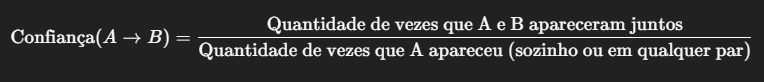

In [10]:
#Calcular confiança (confiança de A → B)
pares = pares.rename(columns={"produto_id_x": "produto_a", "produto_id_y": "produto_b"})
analise_confianca = (
    pares.merge(total_a, on="produto_a")
         .assign(confianca=lambda x: round(x["qtd_juntos"] / x["qtd_a"], 2))
         .sort_values("confianca", ascending=False)
         .reset_index(drop=True)
)

analise_confianca.head(10)

,produto_a,produto_b,qtd_juntos,qtd_a,confianca
0,P004,P036,19,162,0.12
1,P019,P045,22,184,0.12
2,P017,P047,19,171,0.11
3,P013,P019,20,177,0.11
4,P026,P045,20,177,0.11
5,P037,P044,20,185,0.11
6,P011,P047,17,170,0.10
7,P008,P030,18,176,0.10
8,P029,P032,18,186,0.10
9,P002,P038,16,154,0.10
